In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from skimage.io import imsave
from machinedesign.autoencoder.interface import load
from machinedesign.viz import grid_of_images_default
from lightjob.cli import load_db
import keras.backend as K
import matplotlib.pyplot as plt

Using Theano backend.


In [51]:
model = load('../results/jobs/397df4acae0d1690daefd61015d898da')
#model = load('../results/mnist')

In [52]:
#mnist
inp = model.layers[0].input
hid_layer = model.get_layer('winner_take_all_spatial_1')
hid = hid_layer.output
out = model.layers[-1].output
enc = K.function([inp], hid)
dec = K.function([hid], out)

In [ ]:
np.random.seed(42)
xt = np.random.uniform(size=(9, 1, 28, 28))

for nbiter in (1,5,10):
    x = K.placeholder((None, 1, 28, 28))
    y = x
    for _ in range(nbiter):
        y = model(y)
    grad = K.gradients(y[:, :, 14, 14].mean(), x)
    get_grad = K.function([x], grad)

    y = get_grad([xt])
    y = grid_of_images_default(y, normalize=True)
    imsave('out{}.png'.format(nbiter), y)


In [10]:
x = np.random.uniform(size=(1, 1, 28, 28))
#x = np.zeros((1, 1, 28, 28))
#x[:, :, 12:14, 12:14] = 1.0
xlist = [x]
hlist = []
for i in range(99):
    h = enc([x])
    x = dec([h])
    xlist.append(x)
    hlist.append(h)
x = np.concatenate(xlist, axis=0)
h = np.concatenate(hlist, axis=0)
im = grid_of_images_default(x)
imsave('out.png', im)

/home/ubuntu/miniconda2/envs/python3/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


In [16]:
h[-1]

array([[[   0.        ,    0.        ,    0.        ,    0.        ],
        [   0.        ,    0.        ,  100.2325058 ,    0.        ],
        [   0.        ,    0.        ,    0.        ,    0.        ],
        [   0.        ,    0.        ,    0.        ,    0.        ]],

       [[   0.        ,    0.        ,    0.        ,    0.        ],
        [   0.        ,    0.        ,    0.        ,    0.        ],
        [   0.        ,    0.        ,    0.        ,    0.        ],
        [  63.80433655,    0.        ,    0.        ,    0.        ]],

       [[  54.28128052,    0.        ,    0.        ,    0.        ],
        [   0.        ,    0.        ,    0.        ,    0.        ],
        [   0.        ,    0.        ,    0.        ,    0.        ],
        [   0.        ,    0.        ,    0.        ,    0.        ]],

       [[   0.        ,    0.        ,    0.        ,    0.        ],
        [   0.        ,    0.        ,    0.        ,  106.26965332],
        [   0.

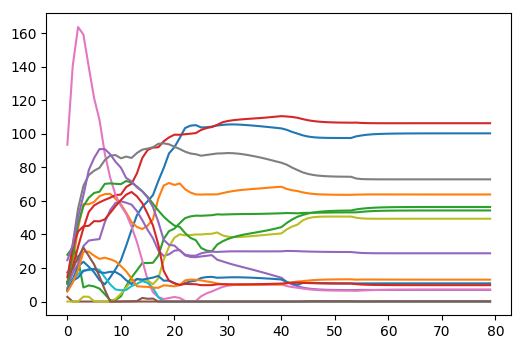

In [11]:
hm  = h.max(axis=(2, 3))
plt.plot(hm[0:80])

In [67]:
hv = np.random.uniform(size=(100,)+hid_layer.output_shape[1:])
n = np.random.uniform(size=(hv.shape[0], hv.shape[1])) <= 0.3
hv[n]=0
hv = 50 * (hv==hv.max(axis=(2, 3), keepdims=True))
x= dec([hv])
x = grid_of_images_default(x)
imsave('out.png', x)

/home/ubuntu/miniconda2/envs/python3/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
